In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Load the provided dataset
data = pd.read_csv('CSUSHPISA.csv')


In [3]:
# Data preprocessing: Extract features from the date
data['DATE'] = pd.to_datetime(data['DATE'])
data['Year'] = data['DATE'].dt.year
data['Month'] = data['DATE'].dt.month
data['Quarter'] = data['DATE'].dt.quarter


In [4]:
# Feature selection
X = data[['Year', 'Month', 'Quarter']]
y = data['CSUSHPISA']


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # You can adjust the number of trees
    'max_depth': [None, 10, 20, 30],  # You can adjust the maximum depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [7]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [8]:
# Best hyperparameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)


In [9]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [10]:
# Print model evaluation metrics and best hyperparameters
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'R-squared (R2): {r2:.2f}')
print(f'Best Hyperparameters: {best_params}')


Mean Squared Error (MSE): 2.60
Mean Absolute Error (MAE): 0.88
R-squared (R2): 1.00
Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


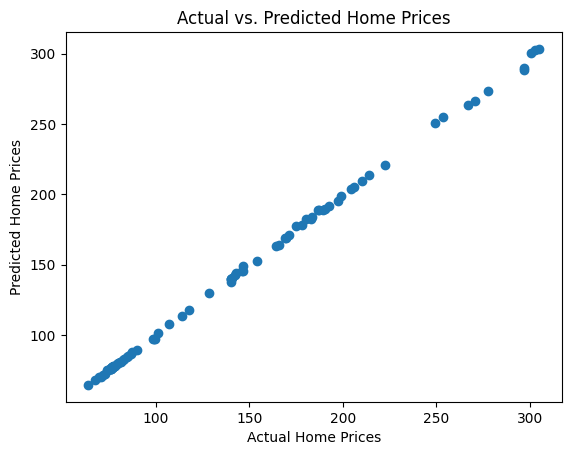

In [11]:
# Visualize the model's predictions
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Home Prices')
plt.ylabel('Predicted Home Prices')
plt.title('Actual vs. Predicted Home Prices')
plt.show()